In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objective 1: Profile & QA the data

### Task 1

In [ ]:
# import/open the data
listings = pd.read_csv(r"C:\Users\annie\OneDrive\Documents\Annie Stuff\Grad School\Python Practice\Listings.csv", encoding='latin1', low_memory=False)
reviews = pd.read_csv(r"C:\Users\annie\OneDrive\Documents\Annie Stuff\Grad School\Python Practice\Reviews.csv", encoding='latin1', low_memory=False)

In [24]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [148]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,9/30/2018,11863072
1,15383,330103585,9/30/2018,39147453
2,16455,329985788,9/30/2018,1125378
3,17919,330016899,9/30/2018,172717984
4,26827,329995638,9/30/2018,17542859


### Task 2

In [105]:
# cast "host_since" column from listings to datetime from object
listings['host_since'] = pd.to_datetime(listings['host_since'])

# cast "date" column from reviews to datetime from object
reviews['date'] = pd.to_datetime(reviews['date'])

### Task 3

In [106]:
# Filter the data down to rows where the city is Paris, and keep only the columns 
# ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

paris_listings = listings[listings['city'] == 'Paris']
paris_listings = paris_listings[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [107]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


### Task 4

In [108]:
# QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [109]:
# host_since is missing 165 dates
null_dates_listings = listings['host_since'].isna().sum()
null_dates_listings

165

In [110]:
listings.describe()

,listing_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,279547,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,2016-04-11 13:01:44.994151680,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
min,2.577000e+03,1.822000e+03,2008-08-12 00:00:00,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,2014-07-01 00:00:00,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,2016-02-14 00:00:00,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,2018-04-09 00:00:00,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,2021-02-26 00:00:00,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
std,1.442576e+07,1.108570e+08,NaN,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625


## Objective 2: Prepare the data for visualization

### Task 1

In [143]:
# Create a table named paris_listings_neighbourhood that groups Paris listings 
# by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean()
sorted_paris_neighbourhood = paris_listings_neighbourhood.sort_values(ascending=False)
sorted_paris_neighbourhood = sorted_paris_neighbourhood.reset_index()
sorted_paris_neighbourhood.columns = ['neighbourhood', 'average_price']
sorted_paris_neighbourhood

,neighbourhood,average_price
0,Elysee,210.536765
1,Louvre,175.379972
2,Passy,161.144635
3,Palais-Bourbon,156.856578
4,Luxembourg,155.638639
5,Bourse,149.496801
6,Hotel-de-Ville,144.472110
7,Temple,138.446823
8,Pantheon,122.662150
9,Opera,119.038644


### Task 2

In [142]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, 
# group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

most_expensive = sorted_paris_neighbourhood.iloc[0, 0]
most_expensive # Elysee

most_expensive_neighbuorhood_listings = paris_listings[paris_listings['neighbourhood'] == most_expensive]
avg_price_most_exp_neighbourhood = most_expensive_neighbuorhood_listings.groupby('accommodates')['price'].mean()
avg_price_most_exp_neighbourhood
avg_price_most_exp_neighbourhood = avg_price_most_exp_neighbourhood.reset_index()
avg_price_most_exp_neighbourhood.columns = ['accommodates', 'average_price']
avg_price_most_exp_neighbourhood

,accommodates,average_price
0,0,0.000000
1,1,79.522222
2,2,155.103352
3,3,152.828767
4,4,212.096070
5,5,328.817073
6,6,355.508571
7,7,411.538462
8,8,405.518519
9,9,440.272727


### Task 3

In [136]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
# and calculate the average price and count of rows representing the number of new hosts
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year.round()
paris_listings['host_since_year'] = paris_listings['host_since_year'].fillna(0).astype(int)

paris_listings_over_time = paris_listings.groupby('host_since_year').agg({'price':'mean', 'host_since_year':'count'})
paris_listings_over_time.columns = ['price', 'host_count']
paris_listings_over_time

,price,host_count
host_since_year,,
0,97.090909,33
2008,77.750000,4
2009,159.641509,106
2010,125.031250,416
2011,124.828230,1339
2012,111.578615,4592
2013,107.096414,8142
2014,100.253800,10922
2015,103.646250,12147


## Objective 3: Visualize the data and summarize findings

### Task 1

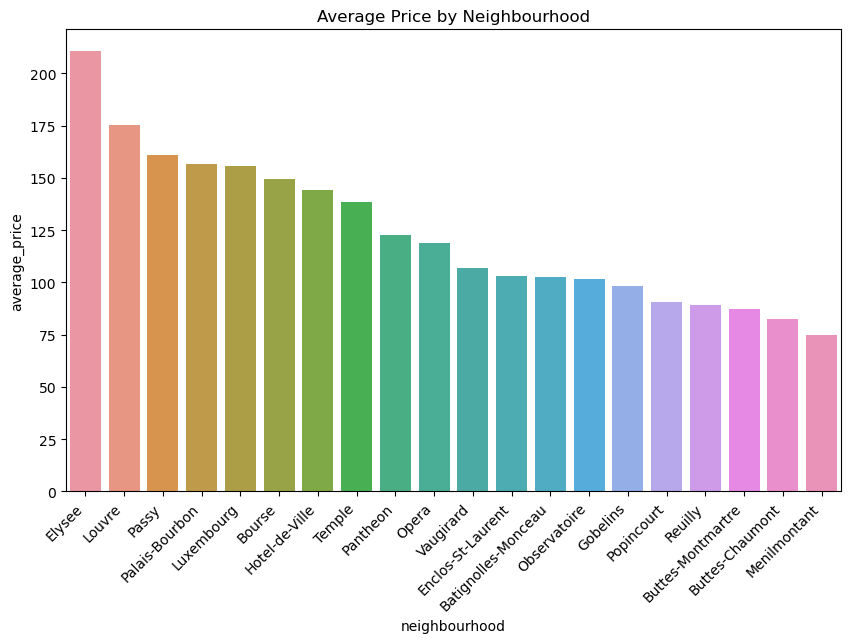

In [94]:
# Creating a bar chart to showcase average price by neighbhoorhood
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='average_price', data=sorted_paris_neighbourhood)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Neighbourhood')
plt.show()

### Task 2

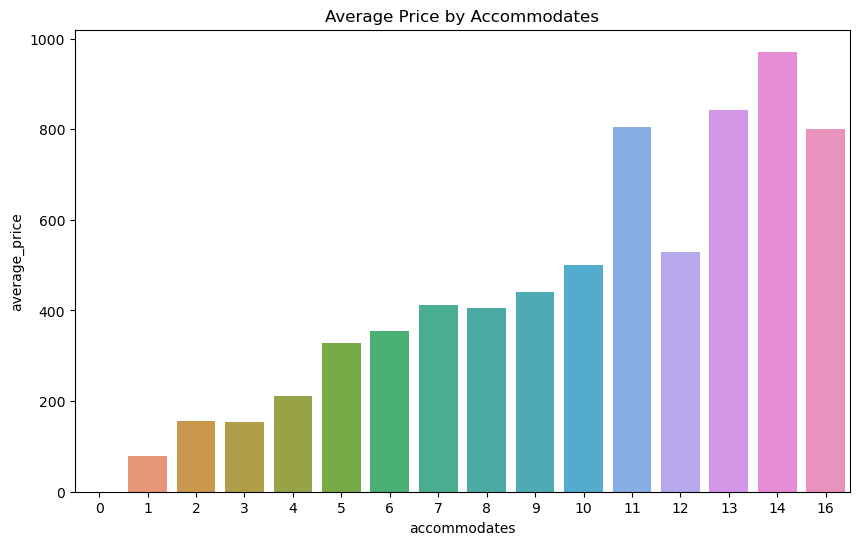

In [127]:
# Creating a bar chart to showcase average price by accommodates
plt.figure(figsize=(10,6))
sns.barplot(x='accommodates', y='average_price', data=avg_price_most_exp_neighbourhood)
plt.title('Average Price by Accommodates')
plt.show()

### Task 3

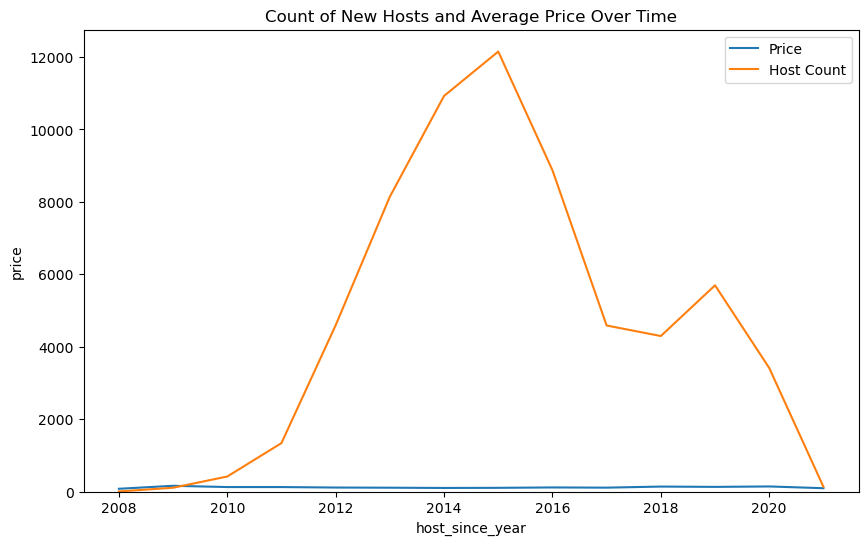

In [144]:
# Create two line charts: one showing the count of new hosts over time, 
# and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
paris_listings_over_time_filtered = paris_listings_over_time[paris_listings_over_time.index != 0]

plt.figure(figsize=(10, 6))
sns.lineplot(data=paris_listings_over_time_filtered, x='host_since_year', y='price', label='Price')
sns.lineplot(data=paris_listings_over_time_filtered, x='host_since_year', y='host_count', label='Host Count')
plt.ylim(0, None)
plt.title('Count of New Hosts and Average Price Over Time')
plt.show()